<a href="https://colab.research.google.com/github/AsherReedy/Monte-Carlo-iRisk-Lab-Meetings-and-Homework/blob/main/MM1_Queue_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 Part 2

I want you to research queueing systems, specifically M/M/1.

Email me if you are unable to find references.

This part will be reviewed and graded by other team members.


# M/M/1 Queue — Quick Demo

**Goal:** simulate an **M/M/1** queue (Markovian/Markovian/1 server) and look at **waiting times**.

**Terms & assumptions**
- **Arrival process:** Poisson with rate $\lambda$ (i.i.d. interarrivals $\sim \text{Exp}(\lambda)$).
- **Service times:** i.i.d. $\text{Exp}(\mu)$ with rate $\mu$.
- **Discipline:** FCFS (first-come, first-served). One server.
- **Utilization:** $\rho = \lambda/\mu$ (must be $<1$ for a stable steady state).
- **Classic results (when $\rho<1$):**
  - $\mathbb E[W_q] = \dfrac{\rho}{\mu(1-\rho)}$  (mean **queue wait**),
  - $\mathbb E[W]   = \dfrac{1}{\mu - \lambda}$     (mean **sojourn** time),
  - $\mathbb E[L_q] = \dfrac{\rho^2}{1-\rho}$ and $\mathbb E[L] = \dfrac{\rho}{1-\rho}$ (number of clients waiting / total).

Change the parameters below and rerun the simulation.


lambda=4.0, mu=5.0, rho=0.800 (stable iff rho<1)
Theory: E[Wq]=0.8000, E[W]=1.0000
Sample means (first 50000 customers):
  mean Wq = 0.7842
  mean W  = 0.9834
First 10 wait-in-queue times: [0.     0.6479 0.6454 0.5172 0.     0.1696 0.0802 0.0129 0.0265 0.1128]


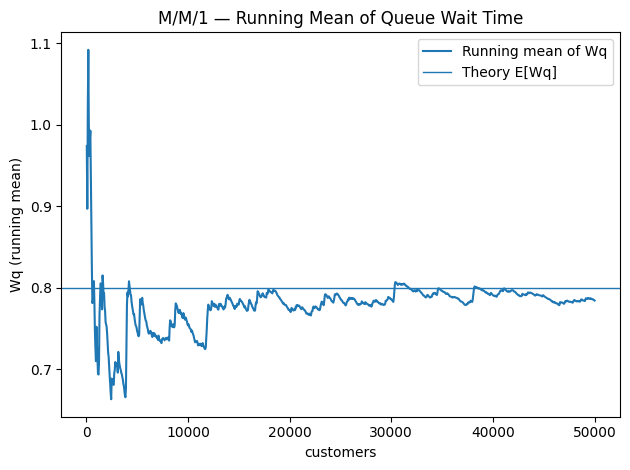

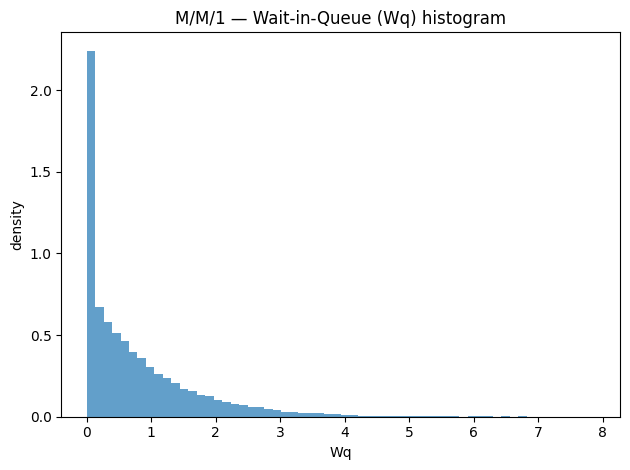

In [20]:

import numpy as np
import math
import matplotlib.pyplot as plt

# --- Parameters (edit these) ---
SEED = 1729
lam  = 4.0       # arrival rate λ (jobs per unit time)
mu   = 5.0       # service rate μ (jobs per unit time)
N    = 50000      # number of arrivals to simulate

rng = np.random.default_rng(SEED)
rho = lam/mu
print(f"lambda={lam}, mu={mu}, rho={rho:.3f} (stable iff rho<1)")

# Theoretical means (if rho < 1)
if rho < 1:
    Ewq = rho/(mu*(1-rho))
    Ew  = 1/(mu - lam)
    print(f"Theory: E[Wq]={Ewq:.4f}, E[W]={Ew:.4f}")
else:
    print("Warning: rho >= 1 (unstable); theoretical steady-state means diverge.")

# --- Simulate M/M/1 with FCFS ---
# Interarrival and service times
interarr = rng.exponential(1/lam, size=N)
service   = rng.exponential(1/mu,  size=N)

arrival_time = np.cumsum(interarr)

# Track start-of-service and completion times
start_service = np.empty(N)
finish_time   = np.empty(N)

# For the first job:
start_service[0] = arrival_time[0]
finish_time[0]   = start_service[0] + service[0]

# Recursion for subsequent jobs:
for i in range(1, N):
    start_service[i] = max(arrival_time[i], finish_time[i-1])  # wait if server busy
    finish_time[i]   = start_service[i] + service[i]

# Metrics
wait_in_queue = start_service - arrival_time         # Wq
sojourn_time  = finish_time   - arrival_time         # W = Wq + service

print(f"Sample means (first {N} customers):")
print(f"  mean Wq = {wait_in_queue.mean():.4f}")
print(f"  mean W  = {sojourn_time.mean():.4f}")

# Show a few wait times
print('First 10 wait-in-queue times:', np.round(wait_in_queue[:10], 4))

# Plot running average of Wq and a histogram
k = 50
idx = np.arange(k, N+1, k)
running_mean = np.array([wait_in_queue[:m].mean() for m in idx])


plt.figure()
plt.plot(idx, running_mean, label="Running mean of Wq")
if rho < 1:
    plt.axhline(Ewq, linewidth=1, label="Theory E[Wq]")
plt.xlabel("customers")
plt.ylabel("Wq (running mean)")
plt.title("M/M/1 — Running Mean of Queue Wait Time")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
plt.hist(wait_in_queue, bins=60, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("M/M/1 — Wait-in-Queue (Wq) histogram")
plt.tight_layout(); plt.show()


#Sources


ChatGPT

- Used to answer specific conceptual questions I had.
- Used to create code to implement the theoretical Erlang-C formulas that I also cross referenced for accuracy.


M/M/1:

[real-statisitcs.com M/M/1](https://real-statistics.com/probability-functions/queueing-theory/m-m-1-queueing-model/
)

M/M/C:

[real-statistics.com M/M/C](https://real-statistics.com/probability-functions/queueing-theory/m-m-s-queueing-model/)

https://en.wikipedia.org/wiki/M/M/c_queue

M/D/1:

[real-statistics.com M/D/1
](https://real-statistics.com/probability-functions/queueing-theory/m-d-1-queueing-model/)

D/M/1:

https://en.wikipedia.org/wiki/D/M/1_queue

Extra:

https://www.youtube.com/watch?v=bkyNocmLUPU


# Q1. Definitions

What does "M/M/1" stand for?
<font color="#00FFFF">  
Markovian, Markovian, "1" server.
Markovian means the next state depends only on the current state. The system is memoryless except for the most recent state.
The 1 indicates that there is 1 server processing the queue.
</font>

---

What distributions are used?
<font color="#00FFFF">  
2 Exponential distributions are used to model both the interarrival times and the service times. The exponential distribution has the memoryless property so that the time of completion for a service is independent of how much time has already passed.

</font>

---

Does the wait-in-queue variable have a common distribution?
<font color="#00FFFF">  
It has a mixed distribution. This is because each customer is either served immediately or has to wait in the queue, in the CDF this creates a point mass of (1-ρ) when there is no waiting time. Then, when there is a line for the queue, the wait time CDF is exponential with rate mu - lamda.

P(Wq ≤ t), is 1 - ρe^-(μ-λ)t for t ≥ 0.

*ρ is the long run fraction of time the server is busy, so the complement (1-ρ) is the probablility the server isn't busy.

*The rate for the queue waiting time is (μ-λ) because customers arrive at rate λ, and are served at rate μ. The difference is an effective "drain rate".

---

What does the utliization parameter measure?
<font color="#00FFFF">  
ρ = λ / μ, Measures the proportion of time that the server is busy serving customers. λ represents the average number of customers coming in and μ represents the average service rate.

</font>

---

What does FCFS or FIFO mean?
<font color="#00FFFF">  
It means "First come first serve" or "First in first out". It means that customers will be served in the order they arrive with no prioritization given.
</font>


# Q2. Modify Example

How would you modify the example to make it M/M/c? (Markovian/Markovian/c servers)
<font color="#00FFFF">  
I would add a parameter c to represent the number of servers and keep an array of length c to keep track of the finish times of all the servers. Inside the simulation loop: Find what server is available earliest, If the server is free before the arrival, start immediately, otherwise wait until the server is free, update the server's finish time and repeat the process.

There are also different theoretical formulas for M/M/c that I would have to implement.
</font>

---

How would you modify the example to make it D/M/1? (Deterministic/Markovian/1server)
<font color="#00FFFF">  
We need to change the simulation so that the arrival times are evenly spaced instead of sampled from an exponential distribution. I would modify the interarr array to be an array filled with the fixed arrival interval 1/λ.

</font>

---

How would you modify the example to make it M/D/1? (Markovian/Deterministic/1server)
<font color="#00FFFF">  
We need to change the simulation so that the service times have a constant length instead of sampled from an exponential distribution. I would modify the service array to be an array filled with constant service times of 1/μ.

</font>

---

Choose one example and create a simulation below. Make sure to document the changes requried.
<font color="#00FFFF">  
M/M/C. Explanation of Implementation:
<font color="#00FFFF">  

To calculate the theoretical values for W, Wq and P(wait) I added the Erlang-C formulas.

For the simulation section, I didn't change much from M/M/1.
- First, I added an array to track each of the servers times that they are available
- For each iteration / customer, I chose the server that will be ready soonest
- If the server is ready before a customer arrives, the customer will be served immediately.
- If a customer arrives and the server isn't ready yet, they wait in the queue and their start time is when the server is ready.
- Then find the time the service ends by adding the service time to the start time.
- Finally, update that server's next available time to equal the end time of the past customer.


lambda=12.0, mu=5.0, c=3, rho=0.800 (stable iff rho<1)
Theory (Erlang C): E[Wq]=0.2157, E[W]=0.4157, P(wait)=0.6472
Sample means (first 50000 customers):
  mean Wq = 0.2097
  mean W  = 0.4089
  prob(wait) ≈ 0.6517


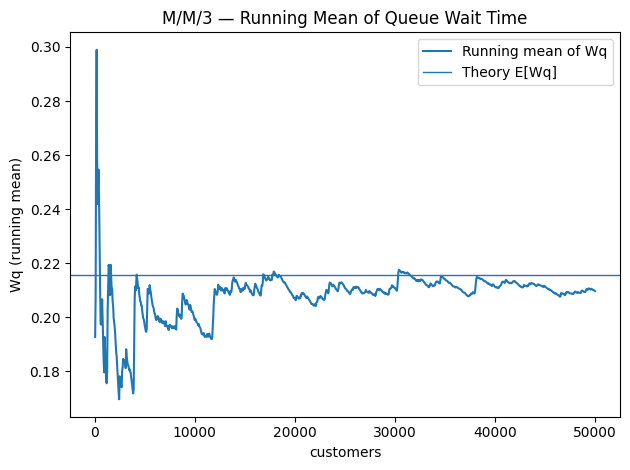

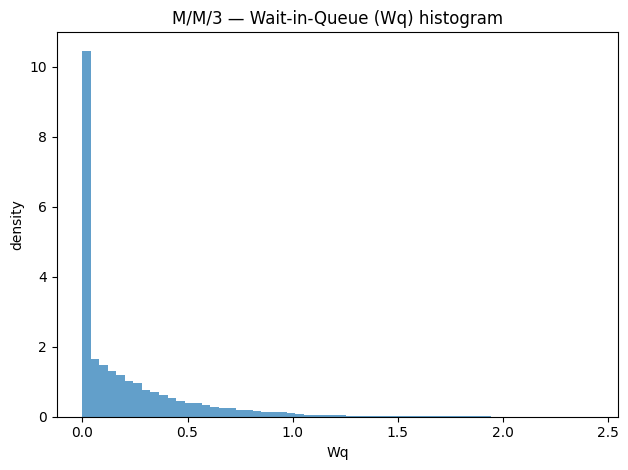

In [21]:
#Q2 code
#Complete before the meeting

import numpy as np
import math
import matplotlib.pyplot as plt

# --- Parameters ---
SEED = 1729
lam  = 12.0       # arrival rate λ (jobs per unit time)
mu   = 5.0       # service rate μ (per server)
c    = 3         # number of servers
N    = 50000     # number of arrivals to simulate

rng = np.random.default_rng(SEED)
rho = lam / (c * mu)
print(f"lambda={lam}, mu={mu}, c={c}, rho={rho:.3f} (stable iff rho<1)")

# --- Theoretical values (Erlang-C formula) ---
def erlang_c(lam, mu, c):
    a = lam / mu
    rho = lam / (c * mu)

    # Normalization constant: probability 0 customers are in the system
    sum_terms = sum((a**n) / math.factorial(n) for n in range(c))
    last_term = (a**c) / (math.factorial(c) * (1 - rho))
    P0 = 1.0 / (sum_terms + last_term)

    # Probability an arrival waits ( Erlang C formula )
    Pw = last_term * P0

    # Mean waiting times
    Ewq = Pw / (c*mu - lam)     # mean wait in queue
    Ew  = Ewq + 1/mu            # mean sojourn
    return Ewq, Ew, Pw

if rho < 1:
    Ewq, Ew, Pw = erlang_c(lam, mu, c)
    print(f"Theory (Erlang C): E[Wq]={Ewq:.4f}, E[W]={Ew:.4f}, P(wait)={Pw:.4f}")
else:
    print("Warning: rho >= 1 (unstable); theoretical steady-state means diverge.")


# --- Simulate M/M/c with FCFS ---
interarr = rng.exponential(1/lam, size=N)
service   = rng.exponential(1/mu,  size=N)

# cumulative sum of interarrival times to make a timeline of arrivals to reference later
arrival_time = np.cumsum(interarr)

start_service = np.empty(N)
finish_time   = np.empty(N)

# Create array to track each server's availibility
server_free = np.zeros(c)

for i in range(N):
    # pick the server that frees up earliest
    j = np.argmin(server_free)
    available = server_free[j]

    # Check whether server is busy upon an arrival
    # If server is busy, the service will start once they become availible
    # If server is not busy, the service will start at the arrival time of the customer

    start_service[i] = max(arrival_time[i], available)
    finish_time[i]   = start_service[i] + service[i]

    # update that server’s free time
    server_free[j] = finish_time[i]


# --- Metrics ---
wait_in_queue = start_service - arrival_time
sojourn_time  = finish_time   - arrival_time

print(f"Sample means (first {N} customers):")
print(f"  mean Wq = {wait_in_queue.mean():.4f}")
print(f"  mean W  = {sojourn_time.mean():.4f}")
print(f"  prob(wait) ≈ {np.mean(wait_in_queue > 1e-12):.4f}")

# --- Plot running mean of Wq ---
k = 50
idx = np.arange(k, N+1, k)
running_mean = np.array([wait_in_queue[:m].mean() for m in idx])

plt.figure()
plt.plot(idx, running_mean, label="Running mean of Wq")
if rho < 1:
    plt.axhline(Ewq, linewidth=1, label="Theory E[Wq]")
plt.xlabel("customers")
plt.ylabel("Wq (running mean)")
plt.title(f"M/M/{c} — Running Mean of Queue Wait Time")
plt.legend(); plt.tight_layout(); plt.show()

# --- Histogram of wait times ---
plt.figure()
plt.hist(wait_in_queue, bins=60, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density");
plt.title(f"M/M/{c} — Wait-in-Queue (Wq) histogram")
plt.tight_layout(); plt.show()

